# Simple Linear Regression - Rahul

In [1]:
# Reading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_house = pd.read_csv('data/Housing.csv')
df_house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
# Show features to make random observations

df_house = df_house.drop(['Address'], axis=1)
df_house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


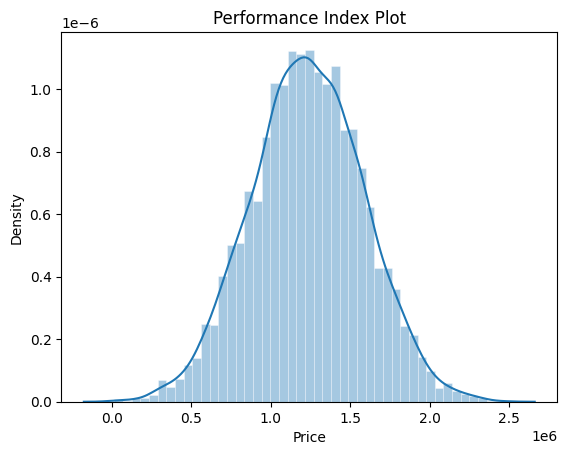

In [3]:
# Show the distribution curve

import seaborn as sns

plt.title('Performance Index Plot')
sns.histplot(df_house['Price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

In [4]:
# Remove outliers and normalize

normal_df = (df_house - df_house.mean())/df_house.std()
normal_df = normal_df.loc[((normal_df > -3).sum(axis=1)==6) & ((normal_df <= 3).sum(axis=1)==6)]

print('Entries before outliers = %d' % (df_house.shape[0]))
print('Entries after outliers = %d' % (normal_df.shape[0]))

Entries before outliers = 5000
Entries after outliers = 4943


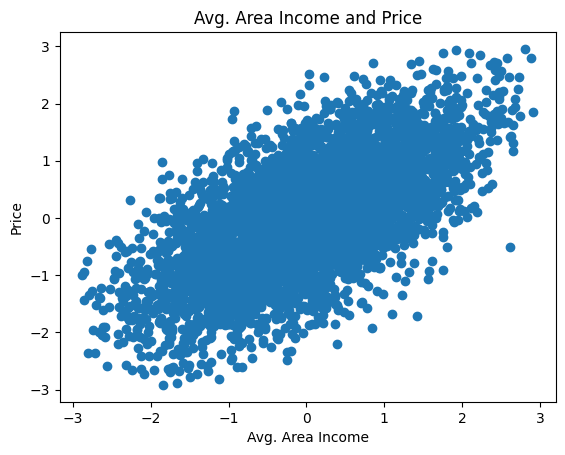

In [5]:
# Scatter plot to show there is a slight linear relationship

plt.scatter(normal_df['Avg. Area Income'], normal_df['Price'])
plt.title('Avg. Area Income and Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

In [6]:
# Split into training and testing data

X = normal_df[['Avg. Area Income']]
y = normal_df['Price']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

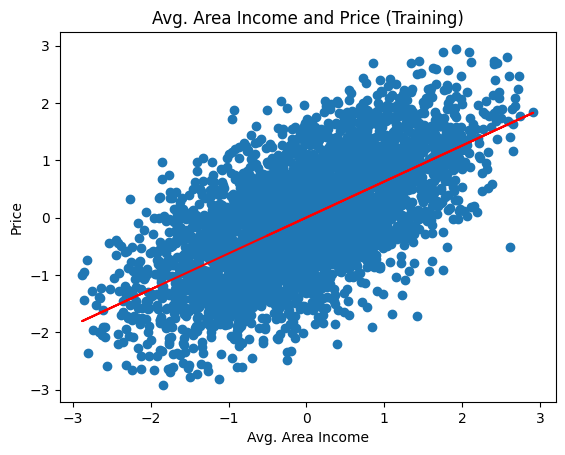

In [8]:
# Prediction on training set

plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color="red")
plt.title('Avg. Area Income and Price (Training)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

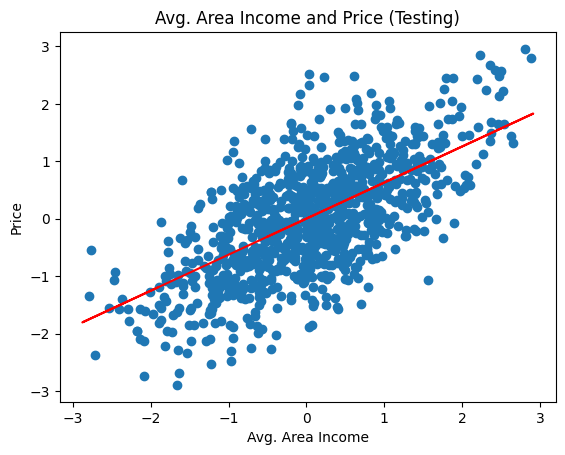

In [9]:
# Prediction on test set

plt.scatter(X_test, y_test)
plt.plot(X_train, y_pred_train, color = 'red')
plt.title('Avg. Area Income and Price (Testing)')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()